# San Francisco Salaries

In [19]:
import pandas as pd

### Erstelle aus salaries.csv einen DataFrame

In [20]:
sal = pd.read_csv("salaries.csv", na_values=['Not Provided'])

/home/krane/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


** Empfohlen: `head()` **

In [21]:
sal.head()

Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.00  400184.25       NaN  567595.43         567595.43   
1  155966.02    245131.88  137811.38       NaN  538909.28         538909.28   
2  212739.13    106088.18   16452.60       NaN  335279.91         335279.91   
3   77916.00     56120.71  198306.90       NaN  332343.61         332343.61   
4  134401.60      9737.00  182234.59       NaN  326373.19         326373.19   

   Year  Notes         Agency Status  
0  2011    NaN  San Francisco    NaN  
1  2011    NaN  San Francisco    NaN  
2  2011    NaN  San Francisco    NaN  
3  2011    NaN  San Francisco    NaN  
4  2011    NaN  San Francisco    NaN

### Wie viele Observations gibt es?

In [22]:
sal.shape[0]

148654

### Was ist das arithmetische Mittel von `BasePay`?
Lösung: `66325.44884050643`

In [23]:
sal["BasePay"].mean()

66325.44884050643

### Was ist der höchste Geldbetrag, der als `OvertimePay` vorhanden ist?
Lösung: `245131.88`

In [24]:
sal["OvertimePay"].max()

245131.88

### Welchen Job hat JOSEPH DRISCOLL? (**Nicht** Joseph Driscoll).
Lösung:
```
CAPTAIN, FIRE SUPPRESSION
```

In [25]:
sal[sal["EmployeeName"] == "JOSEPH DRISCOLL"]["JobTitle"].values[0]

'CAPTAIN, FIRE SUPPRESSION'

### Was ist das Gesamtgehalt von JOSEPH DRISCOLL?
Lösung:
```
270324.91
```

In [26]:
sal[sal["EmployeeName"] == "JOSEPH DRISCOLL"]["TotalPay"].values[0]

270324.91

### Wie lautet der Name der bestverdienensten Person?
Lösung: `NATHANIEL FORD`

In [27]:
sal[sal["TotalPay"] == sal["TotalPay"].max()]["EmployeeName"].values[0]

'NATHANIEL FORD'

### Wie lautet der Name der am schlechtest bezahlten Person?
Lösung: `Joe Lopez`

In [28]:
sal[sal["TotalPay"] == sal["TotalPay"].min()]["EmployeeName"].values[0]

'Joe Lopez'

### Ermittle für die Jahre 2011-2014 den arithmetischen Mittelwert des `BasePay`s aller Personen.
Lösung:
```
Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
```


In [29]:
sal[(sal["Year"] >= 2011) & (sal["Year"] <= 2014)].groupby(by="Year")["BasePay"].mean()

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

### Wie viele unterschiedliche Jobs gibt es?
Lösung: `2159`

In [30]:
sal["JobTitle"].unique().shape[0]

2159

### Welche sind die Top 5 häufigsten Jobs und wie viele gibt es davon jeweils?
Lösung:
```
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64
```


In [31]:
sal.groupby("JobTitle")["Id"].nunique().sort_values(ascending=False).head(5)

JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: Id, dtype: int64

### Wie viele Jobs gibt es, die 2013 nur eine Person ausübte?
Lösung: `202`

In [32]:
(sal[sal["Year"] == 2013].groupby("JobTitle")["Id"].nunique() == 1).sum()

202

### Wie viele läute haben `'chief'` (caseinsensitive) im Jobnamen?
Lösung: `627`

In [33]:
sal["JobTitle"].apply(lambda x: "chief" in str(x).lower()).sum()

627

### Erstelle ein Histogramm 

In [34]:
sal.head()

Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.00  400184.25       NaN  567595.43         567595.43   
1  155966.02    245131.88  137811.38       NaN  538909.28         538909.28   
2  212739.13    106088.18   16452.60       NaN  335279.91         335279.91   
3   77916.00     56120.71  198306.90       NaN  332343.61         332343.61   
4  134401.60      9737.00  182234.59       NaN  326373.19         326373.19   

   Year  Notes         Agency Status  
0  2011    NaN  San Francisco    NaN  
1  2011    NaN  San Francisco    NaN  
2  2011    NaN  San Francisco    NaN  
3  2011    NaN  San Francisco    NaN  
4  2011    NaN  San Francisco    NaN

<AxesSubplot:xlabel='Year'>

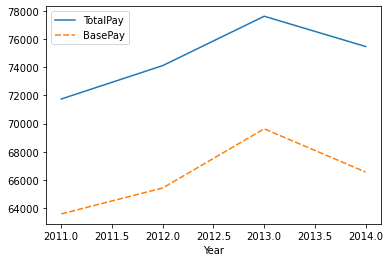

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams['figure.figsize'] = (15, 10)

total_pay_mean_by_year = sal.groupby("Year")[["TotalPay", "BasePay"]].mean()#.reset_index(name="TotalPayMean") # reset_index to name the column if only 1 exists
#print(total_pay_mean_by_year)
sns.lineplot(data=total_pay_mean_by_year)

<AxesSubplot:xlabel='BasePay', ylabel='Count'>

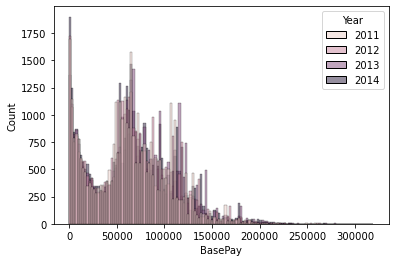

In [41]:
sns.histplot(data=sal, x="BasePay", hue="Year")